In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
file = "DataForTable2.1.csv"
happiness_years = pd.read_csv(file)
happiness_years.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440


In [3]:
happiness_years.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
count,2089.000000,2089.000000,2062.000000,2076.000000,2031.000000,2057.000000,2009.000000,1976.000000,2065.000000,2073.000000,1873.000000
mean,2013.727621,5.473747,9.378408,0.811542,63.180326,0.745462,0.000102,0.746474,0.651421,0.270544,0.483914
std,4.455614,1.115567,1.143520,0.118935,6.948546,0.140751,0.161082,0.186136,0.105954,0.085849,0.191515
min,2005.000000,2.178809,5.526723,0.290184,6.720000,0.257534,-0.335739,0.035198,0.178886,0.082737,0.068769
25%,2010.000000,4.651972,8.473547,0.747664,58.965000,0.651689,-0.113172,0.689840,0.570057,0.207652,0.334808
50%,2014.000000,5.405246,9.463269,0.834770,64.980003,0.767357,-0.023366,0.801339,0.662837,0.260328,0.467046
75%,2017.000000,6.294282,10.347656,0.904682,68.362499,0.857677,0.090584,0.870789,0.737176,0.321706,0.616302
max,2021.000000,8.018934,11.665803,0.987343,74.349998,0.985178,0.706377,0.983276,0.883586,0.704590,0.993604


In [4]:
happiness_years.loc[happiness_years["Generosity"] == 0]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government


In [5]:
# keep needed series
happiness_2021 = happiness_years.loc[happiness_years['year']==happiness_years['year'].max(),
                                   ["Country name","Life Ladder","Log GDP per capita","Social support",
                                   "Healthy life expectancy at birth","Freedom to make life choices"]]
happiness_2021["Country name"].nunique()

119

In [6]:
# HOW TO HANDLE NaN VALUES - remove null values for any of the 4 colums we're looking at

#set NaN values to 0 - none of the colums have a legitimate value of 0
#happiness_years = happiness_years.fillna(0)
#happiness_years.head()
happiness_2021 = happiness_2021.dropna()
happiness_2021.head()

,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices
26,Albania,5.255482,9.562287,0.701883,69.150002,0.827453
36,Algeria,5.217018,9.303516,0.840710,66.599998,0.558487
56,Argentina,5.908279,9.955421,0.882305,67.199997,0.819479
71,Armenia,5.300569,9.500485,0.762044,67.650002,0.795170
86,Australia,7.111599,10.818342,0.919755,71.050003,0.912402


In [7]:
happiness_2021 = happiness_2021.rename(columns = {'Log GDP per capita': 'GDP per capita',
                                              'Life Ladder':'Happiness score',
                                             'Healthy life expectancy at birth': 'healthy life expectancy',
                                                 'Country name':'Country'})
happiness_2021.head()

,Country,Happiness score,GDP per capita,Social support,healthy life expectancy,Freedom to make life choices
26,Albania,5.255482,9.562287,0.701883,69.150002,0.827453
36,Algeria,5.217018,9.303516,0.840710,66.599998,0.558487
56,Argentina,5.908279,9.955421,0.882305,67.199997,0.819479
71,Armenia,5.300569,9.500485,0.762044,67.650002,0.795170
86,Australia,7.111599,10.818342,0.919755,71.050003,0.912402


In [8]:
#corr table for reference
corr = happiness_2021.corr()
corr = corr.style.background_gradient(cmap='PRGn')
corr

,Happiness score,GDP per capita,Social support,healthy life expectancy,Freedom to make life choices
Happiness score,1.000000,0.795247,0.808799,0.711411,0.579028
GDP per capita,0.795247,1.000000,0.767490,0.856166,0.329454
Social support,0.808799,0.767490,1.000000,0.713057,0.429402
healthy life expectancy,0.711411,0.856166,0.713057,1.000000,0.340498
Freedom to make life choices,0.579028,0.329454,0.429402,0.340498,1.000000


In [9]:
#export to csv
happiness_2021.to_csv('cleaned_happiness_2021.csv', index = False)

In [10]:
# Start of Amanda's code

In [11]:
# re-importing cleaned data so as to not have to rerun above code
happiness_2021 = pd.read_csv('cleaned_happiness_2021.csv')
happiness_2021.describe()

,Happiness score,GDP per capita,Social support,healthy life expectancy,Freedom to make life choices
count,110.000000,110.000000,110.000000,110.000000,110.000000
mean,5.638666,9.561866,0.805196,65.305000,0.790595
std,1.128916,1.037003,0.124863,5.458450,0.107183
min,2.178809,7.108412,0.435524,51.299999,0.422697
25%,4.913588,8.896770,0.713824,61.862499,0.724480
50%,5.734929,9.575068,0.844487,66.450001,0.809086
75%,6.442878,10.431378,0.905608,69.299999,0.869746
max,7.794378,11.545033,0.979858,74.349998,0.965093


### Social Support
Per the World Happiness Report: 
>Social support (or having someone to count on in times of trouble) is the national average of the binary responses (either 0 or 1) to the GWP question “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”

### Null Hypothesis Test
Null hypothesis - the means for happiness of the top, middle, and bottom third of countries based on social support are the same

In [12]:
# sort dataset and see how many values need to be in each group
h0_test = happiness_2021[["Country","Happiness score","Social support"]]
h0_test = h0_test.sort_values("Social support")
size = h0_test.count() # 110 countries total
# size/3 = 36.666667 - make 2 groups at 37 and one at 36
h0_test.head()

,Country,Happiness score,Social support
6,Benin,4.493431,0.435524
63,Morocco,5.326249,0.504564
55,Lebanon,2.178809,0.506775
46,Ivory Coast,5.055807,0.554225
57,Malawi,3.635283,0.557914


In [13]:
bottom_third = h0_test.iloc[0:37,:]
bottom_third

,Country,Happiness score,Social support
6,Benin,4.493431,0.435524
63,Morocco,5.326249,0.504564
55,Lebanon,2.178809,0.506775
46,Ivory Coast,5.055807,0.554225
57,Malawi,3.635283,0.557914
18,Congo (Brazzaville),4.920531,0.567651
39,India,3.558254,0.569733
58,Mali,4.113096,0.573394
97,Togo,4.036544,0.603400
74,Pakistan,4.486835,0.608396


In [14]:
middle_third = h0_test.iloc[37:74,:]
middle_third

,Country,Happiness score,Social support
65,Myanmar,4.314040,0.779576
24,Ecuador,5.434872,0.785532
17,Colombia,5.289958,0.792831
100,Uganda,4.224534,0.793350
26,El Salvador,6.431447,0.796106
7,Bolivia,5.568624,0.797810
107,Vietnam,5.540250,0.799494
36,Honduras,6.113636,0.805981
66,Namibia,4.491207,0.807801
72,North Macedonia,5.534750,0.808857


In [15]:
top_third = h0_test.iloc[74:110,:]
top_third

,Country,Happiness score,Social support
59,Mauritius,5.949120,0.886510
85,Serbia,6.245267,0.890106
15,Chile,6.435631,0.891461
80,Portugal,6.183014,0.894942
106,Uzbekistan,6.185308,0.895504
48,Japan,6.091325,0.895738
75,Panama,6.552779,0.898621
52,Kyrgyzstan,5.563700,0.904273
50,Kazakhstan,6.259634,0.906053
76,Paraguay,5.575535,0.907542


In [16]:
# concatenate the thirds back together just to triple check there aren't duplicate countries
check_df = pd.concat([top_third,middle_third,bottom_third])
check_df.value_counts()

Country      Happiness score  Social support
Albania      5.255482         0.701883          1
New Zealand  7.136701         0.949832          1
Portugal     6.183014         0.894942          1
Poland       5.978069         0.935535          1
Philippines  5.965058         0.778192          1
                                               ..
Ghana        4.377951         0.632730          1
Germany      6.754524         0.867583          1
Georgia      4.911273         0.670689          1
Gabon        5.075422         0.753872          1
Zimbabwe     3.154578         0.685151          1
Length: 110, dtype: int64

In [17]:
# get only the happiness score for each group and double check the count is correct
top_happiness = top_third["Happiness score"]
middle_happiness = middle_third["Happiness score"]
bottom_happiness = bottom_third["Happiness score"]
total = top_happiness.count() + middle_happiness.count() + bottom_happiness.count()
print(total)

110


In [18]:
# run ANOVA test!
st.f_oneway(top_happiness,middle_happiness,bottom_happiness)

F_onewayResult(statistic=81.59422930551752, pvalue=3.0050980152485063e-22)

In [19]:
bottom_third['Social support'].std()

0.0836019454461819

In [20]:
middle_third['Social support'].std()

0.0327845657402368

In [21]:
top_third['Social support'].std()

0.023656948674724176

In [22]:
# Run Kruskal test as standard deviations might be different
st.kruskal(top_happiness,middle_happiness,bottom_happiness)

KruskalResult(statistic=69.45942035401498, pvalue=8.261872947301994e-16)

### Result
The pvalue is either 3.0050980152485063e-22 or 8.261872947301994e-16 (depending on test), both of which are quite smaller than 0.5! This rejects the null hypothesis that says the means of all three groups are the same, indicating there is a statistically significant correlation between happiness and social support.

### Other analysis

In [23]:
x_values = happiness_2021['Social support']
y_values = happiness_2021['Happiness score']

In [24]:
quartiles = x_values.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Q1: {lowerq}\nQ3: {upperq}\nIQR: {iqr}\nLower Bound: {lower_bound}\nUpper Bound: {upper_bound}")

Q1: 0.71382378
Q3: 0.905608341
IQR: 0.19178456099999996
Lower Bound: 0.42614693850000007
Upper Bound: 1.1932851825


In [25]:
outliers = happiness_2021.loc[x_values<lower_bound,:]
outliers
#outliers.sort_values('Social support')

,Country,Happiness score,GDP per capita,Social support,healthy life expectancy,Freedom to make life choices


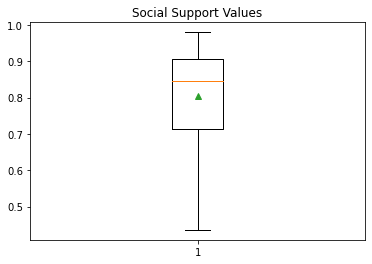

In [26]:
plt.boxplot(x_values, showmeans=True)
plt.title("Social Support Values")
for country in outliers['Country'].values:
    y = outliers.loc[outliers['Country']==country,'Social support']
    plt.annotate(country,(1.05,y),fontsize=10,color="red")
plt.show()

In [27]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

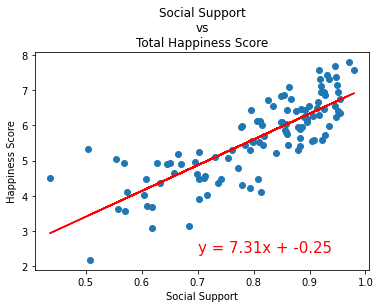

In [28]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.7,2.4),fontsize=15,color="red")
plt.xlabel("Social Support")
plt.ylabel("Happiness Score")
plt.title("Social Support\nvs\nTotal Happiness Score")
plt.show()

In [29]:
pr = round(st.pearsonr(x_values,y_values)[0],2)
print(f'The correlation between social support and happiness is {pr}, suggesting a strong link between the two factors.')

The correlation between social support and happiness is 0.81, suggesting a strong link between the two factors.


In [30]:
bottom_8 = happiness_2021[["Country","Happiness score","Social support"]].sort_values('Social support').head(8)
bottom_8.sort_values(['Happiness score','Social support'])

,Country,Happiness score,Social support
55,Lebanon,2.178809,0.506775
39,India,3.558254,0.569733
57,Malawi,3.635283,0.557914
58,Mali,4.113096,0.573394
6,Benin,4.493431,0.435524
18,Congo (Brazzaville),4.920531,0.567651
46,Ivory Coast,5.055807,0.554225
63,Morocco,5.326249,0.504564


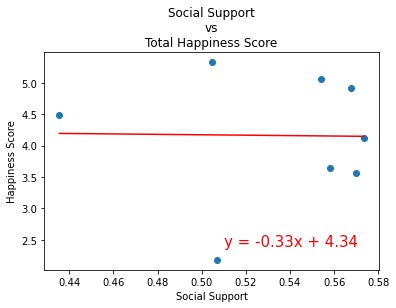

The correlation between social support and happiness for bottom 8 countries is -0.02


In [31]:
x_values = bottom_8['Social support']
y_values = bottom_8['Happiness score']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.51,2.4),fontsize=15,color="red")
plt.xlabel("Social Support")
plt.ylabel("Happiness Score")
plt.title("Social Support\nvs\nTotal Happiness Score")
plt.show()
pr = round(st.pearsonr(x_values,y_values)[0],2)
print(f'The correlation between social support and happiness for bottom 8 countries is {pr}')

In [32]:
# End of Amanda's code

In [33]:
# Start John's code

In [34]:
# End John's code

In [35]:
# Start Nathan's code

Before beginning any analysis, it's important to note that with GDP data, we dropped countries in the original data file that have "na" values in GDP per capita, all of these countries have "na" because the GDP per capita may be in some way hard to determine, therefore what remains should be truthful values that can all be used in analysis. For this reason, to look for outliers would be redundant, because it has effectively been done for us.

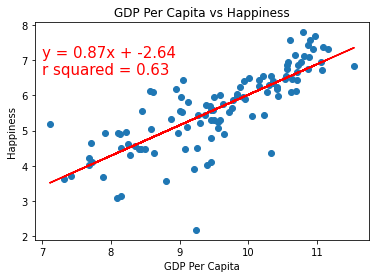

In [36]:
x_axis = happiness_2021["GDP per capita"]
y_axis = happiness_2021["Happiness score"]


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
rsquared = f"r squared = {round(rvalue * rvalue, 2)}"

plt.plot(x_axis, regress_values, color='red')
plt.annotate(line_eq, (7,7.1), fontsize=15, color="red")
plt.annotate(rsquared, (7,6.6), fontsize=15, color="red")

plt.title("GDP Per Capita vs Happiness")
plt.ylabel("Happiness")
plt.xlabel("GDP Per Capita")

plt.scatter(x_axis, y_axis)
plt.show()

This is a simple scatterplot of the data, along with a linear regression, showing a general trend where higher GDP Per Capita leads to a higher happiness score.

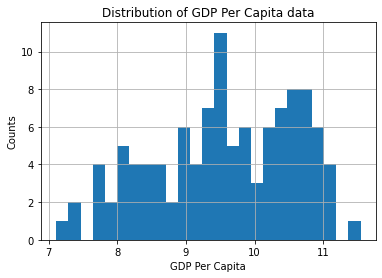

In [37]:
happiness_2021["GDP per capita"].hist(bins=25)

plt.xlabel("GDP Per Capita")
plt.ylabel("Counts")
plt.title("Distribution of GDP Per Capita data")

plt.show()

This plot uses bins of the GDP data to visualize where the GDP is clustered. We can use this to approximate higher, lower, and middle thirds of the data.

In [38]:
# Extract individual groups
group0 = happiness_2021[happiness_2021["GDP per capita"] < 8.75]["Happiness score"]
group1 = happiness_2021[happiness_2021["GDP per capita"].between(8.75, 10.25, inclusive='both')]["Happiness score"]
group2 = happiness_2021[happiness_2021["GDP per capita"] > 10.25]["Happiness score"]

# Perform the ANOVA
st.f_oneway(group0, group1, group2)

F_onewayResult(statistic=66.84719963035289, pvalue=1.4574777104746294e-19)

With a P value much lower than .05, we can reject the null hypothesis that GDP per capita has no effect on happiness score.

In [39]:
# End Nathan's code

In [40]:
# Start Joey's code

# Freedom to Make Life Choices

> Freedom to make life choices is the national average of a binary response (0=no, 1=yes) to the question "Are you satisfied or dissatisfied with your freedom to choice what to do with your life?

In [41]:
happiness_2021

,Country,Happiness score,GDP per capita,Social support,healthy life expectancy,Freedom to make life choices
0,Albania,5.255482,9.562287,0.701883,69.150002,0.827453
1,Algeria,5.217018,9.303516,0.840710,66.599998,0.558487
2,Argentina,5.908279,9.955421,0.882305,67.199997,0.819479
3,Armenia,5.300569,9.500485,0.762044,67.650002,0.795170
4,Australia,7.111599,10.818342,0.919755,71.050003,0.912402
...,...,...,...,...,...,...
105,Uruguay,6.501700,10.010917,0.913873,67.500000,0.898724
106,Uzbekistan,6.185308,8.941695,0.895504,65.300003,0.927415
107,Vietnam,5.540250,9.028702,0.799494,65.500000,0.896800
108,Zambia,3.082155,8.087629,0.619071,55.250000,0.832574


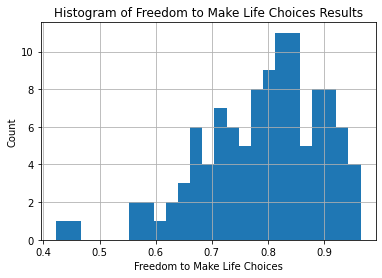

In [42]:
happiness_2021['Freedom to make life choices']. hist(bins=25)

plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Count')
plt.title('Histogram of Freedom to Make Life Choices Results')
plt.show()

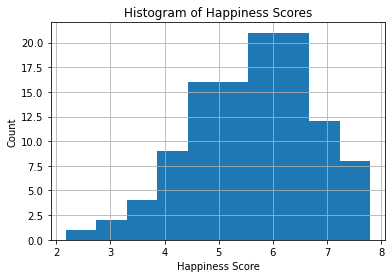

In [43]:
happiness_2021['Happiness score']. hist(bins=10)

plt.xlabel('Happiness Score')
plt.ylabel('Count')
plt.title('Histogram of Happiness Scores')
plt.show()

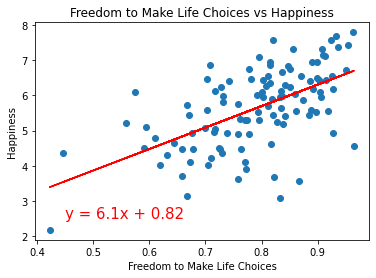

 rvalue = 0.58 
 r-squared = 0.3352737282074053
 Pearsons correlation = (0.5790282620109359, 3.44134129890521e-11)


In [44]:
x_axis = happiness_2021['Freedom to make life choices']
y_axis = happiness_2021['Happiness score']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

plt.plot(x_axis, regress_values, color='red')
plt.annotate(line_eq, (0.45,2.5), fontsize=15, color='red')

plt.title('Freedom to Make Life Choices vs Happiness')
plt.ylabel('Happiness')
plt.xlabel('Freedom to Make Life Choices')

res = st.linregress(x_axis, y_axis)

plt.scatter(x_axis, y_axis)
plt.show()

pearson_r = st.pearsonr(x_axis, y_axis)

print(f' rvalue = {round(rvalue,2)} ')
print(f' r-squared = {res.rvalue**2}')
print(f' Pearsons correlation = {pearson_r}')

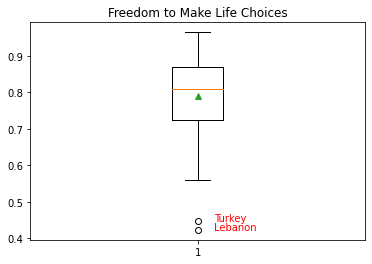

Q1: 0.724479601
Q3: 0.8697462085000001
IQR: 0.1452666075000001
Lower Bound: 0.5065796897499999
Upper Bound: 1.0876461197500003


In [45]:
#define upper and lower bounds
quartiles = x_axis.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


#find freedom outliers
outliers = happiness_2021.loc[x_axis<lower_bound,:]
outliers
outliers.sort_values('Freedom to make life choices')

#create boxplot
plt.boxplot(x_axis, showmeans=True)
plt.title("Freedom to Make Life Choices")
for country in outliers['Country'].values:
    y = outliers.loc[outliers['Country']==country,'Freedom to make life choices']
    plt.annotate(country,(1.05,y),fontsize=10,color="red")
plt.show()

print(f"Q1: {lowerq}\nQ3: {upperq}\nIQR: {iqr}\nLower Bound: {lower_bound}\nUpper Bound: {upper_bound}")


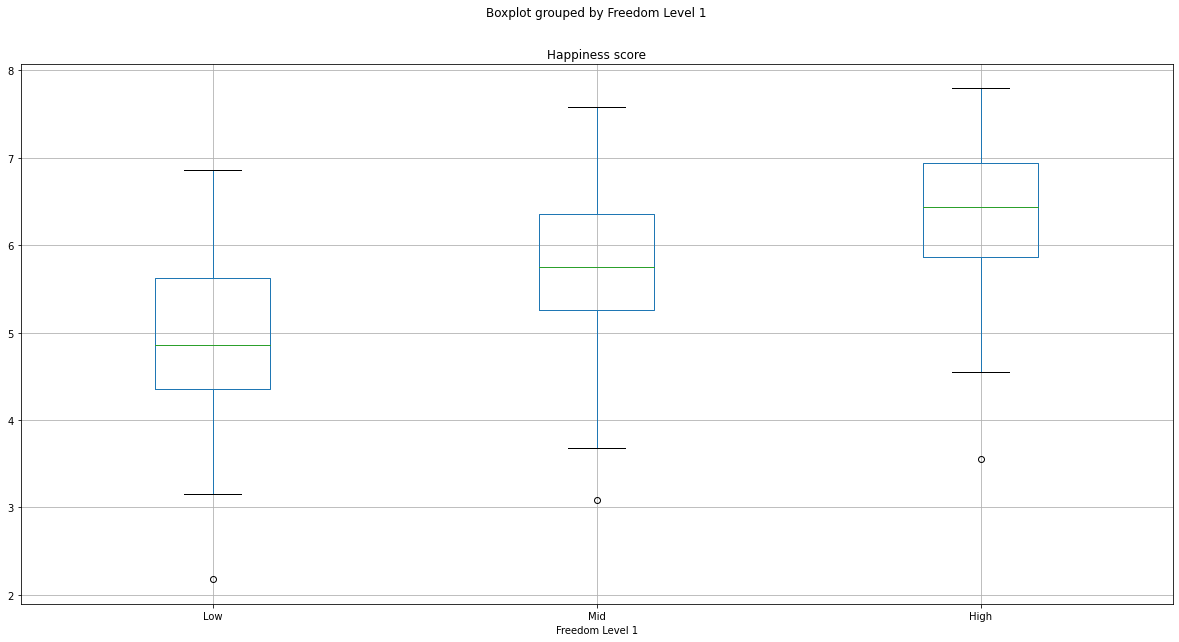

F_onewayResult(statistic=20.730358438619355, pvalue=2.459314123330505e-08)

In [46]:
#sorting by freedom scores and creating three groups
freedom_sort = happiness_2021[['Freedom to make life choices', 'Happiness score']].copy()
freedom_sort = freedom_sort.sort_values(by=['Freedom to make life choices'], ascending=True)
#freedom_sort = freedom_sort.reset_index
freedom_low = freedom_sort.iloc[0:36]
freedom_mid = freedom_sort.iloc[36:73]
freedom_high = freedom_sort.iloc[73:110]

bins = [0, 0.7573, 0.83811, 1]
group_names = ['Low', "Mid", "High"]

freedom_sort["Freedom Level 1"] = pd.cut(freedom_sort["Freedom to make life choices"], bins, labels=group_names, include_lowest=True)
freedom_sort

freedom_sort.boxplot('Happiness score', by='Freedom Level 1', figsize=(20,10))
plt.show()

st.f_oneway(freedom_low['Happiness score'], freedom_mid['Happiness score'], freedom_high['Happiness score'])
#print('There is a statistically significant difference in happiness score between the groups')

<AxesSubplot:>

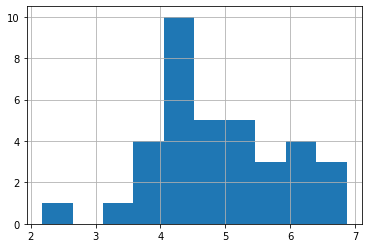

In [47]:
freedom_low['Happiness score'].hist(bins=10)

<AxesSubplot:>

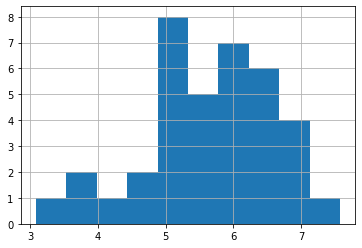

In [48]:
freedom_mid['Happiness score'].hist(bins=10)

<AxesSubplot:>

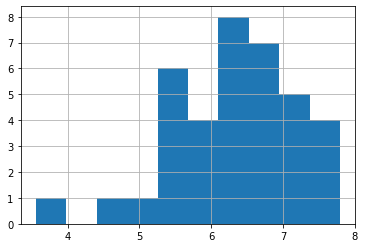

In [49]:
freedom_high['Happiness score'].hist(bins=10)

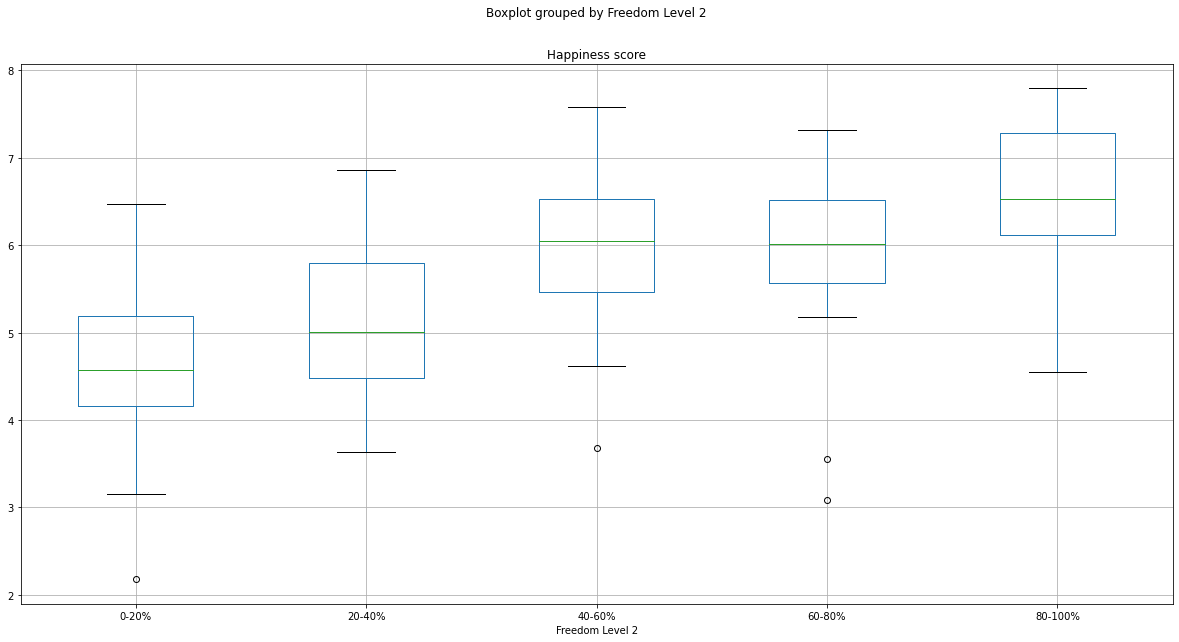

F_onewayResult(statistic=8.467796348343313, pvalue=5.8255273456858264e-06)

In [50]:
#sorting by freedom scores and creating five groups
freedom_sort = happiness_2021[['Freedom to make life choices', 'Happiness score']].copy()
freedom_sort = freedom_sort.sort_values(by=['Freedom to make life choices'], ascending=True)
#freedom_sort = freedom_sort.reset_index
freedom_0_20 = freedom_sort.iloc[0:22]
freedom_20_40 = freedom_sort.iloc[22:44]
freedom_40_60 = freedom_sort.iloc[44:66]
freedom_60_80 = freedom_sort.iloc[66:88]
freedom_80_100 = freedom_sort.iloc[88:110]

#creating bins by 20%
bins = [0, 0.70445, 0.77467, 0.82746, 0.89053, 1]
group_names = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']

freedom_sort["Freedom Level 2"] = pd.cut(freedom_sort["Freedom to make life choices"], bins, labels=group_names, include_lowest=True)
freedom_sort

#making box plot
freedom_sort.boxplot('Happiness score', by='Freedom Level 2', figsize=(20,10))
plt.show()

#one way ANOVA test
st.f_oneway(freedom_0_20['Happiness score'], 
            freedom_20_40['Happiness score'], 
            freedom_40_60['Happiness score'], 
            freedom_60_80['Happiness score'],
            freedom_60_80['Happiness score'])

In [ ]:
# End Joey's code